<a href="https://colab.research.google.com/github/SmeetGala/Financial/blob/main/Sentiment_Analysis_Reliance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
access_token ="806070223715581952-9McJuXQnk3I59ZI3W3OVbVV9bOGjFk1"
acc_token_secret= "5uCbPFOKaR6hwho1pJne313x4Hz2kC3ZaDbZKuN52ay2b"

api_key= "BusTsBcyc0WxmSSP4TRWTfLqJ"
api_sec_key="vhqnribIf5bImeXnwQQoNkF4qTwPVlYkrl1xYDogzwGLF6LIba"

auth = tweepy.OAuthHandler(api_key, api_sec_key)
auth.set_access_token(access_token, acc_token_secret)
api = tweepy.API(auth)

print('Logged in Successfully')

Logged in Successfully


In [ ]:
# Fetch tweets

search_words = ["#reliance", "RIL"]
date_since = "2020-09-11"

posts = api.search(
              q=search_words,
              lang="en",
              since=date_since,
              count= 100000
              )
i=1
for tweet in posts:
  
  print(str(i) + ')'+ tweet.text + '\n')
  i= i+1

1)RT @ETNOWlive: .@Google pays Rs 33,737 crore for a 7.73% stake in #RelianceIndustries's digital subsidiary, #Jio, joining the list of globa…

2)RT @asrkanth: @ameyahardas #Reliance apna #Bhagwan hai, 9/10 times #SKARSH Reads its levels to #Precision for once take out 1977 on closing…

3)@ameyahardas #Reliance apna #Bhagwan hai, 9/10 times #SKARSH Reads its levels to #Precision for once take out 1977… https://t.co/JknNl7X9V9

4)RT @ETNOWlive: .@Google pays Rs 33,737 crore for a 7.73% stake in #RelianceIndustries's digital subsidiary, #Jio, joining the list of globa…

5)RIL may take retail segment of ITC

#Roumers
#Reliance 
#ITC

6)RT @ETNOWlive: .@Google pays Rs 33,737 crore for a 7.73% stake in #RelianceIndustries's digital subsidiary, #Jio, joining the list of globa…

7)RT @ETNOWlive: .@Google pays Rs 33,737 crore for a 7.73% stake in #RelianceIndustries's digital subsidiary, #Jio, joining the list of globa…

8)RT @ETNOWlive: .@Google pays Rs 33,737 crore for a 7.73% stake in #Reli

In [ ]:
# Creating a dataframe with a column called Tweets

df = pd.DataFrame( [tweet.text for tweet in posts], columns = ['Tweets'])

# Show the first 5 rows of the data

df.head()

,Tweets
0,"RT @ETNOWlive: .@Google pays Rs 33,737 crore f..."
1,RT @asrkanth: @ameyahardas #Reliance apna #Bha...
2,"@ameyahardas #Reliance apna #Bhagwan hai, 9/10..."
3,"RT @ETNOWlive: .@Google pays Rs 33,737 crore f..."
4,RIL may take retail segment of ITC\n\n#Roumers...


In [ ]:
# Clean the text

# Create a function to clean the tweets

def clean_tweets(text):
  
  text = re.sub(r'@[A-Za-z0-9]+' , '', text) #Removes @mentions
  text = re.sub(r'#', '', text)               #Removes '#' symbol
  text = re.sub(r'RT[\s]+', '', text)         #Removes 'RT' or retweets
  text = re.sub(r'https?:\/\/\S+', '', text)  #Removes hyperlinks

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(clean_tweets)

# Show the clean texts

df

,Tweets
0,": . pays Rs 33,737 crore for a 7.73% stake in ..."
1,": Reliance apna Bhagwan hai, 9/10 times SKARS..."
2,"Reliance apna Bhagwan hai, 9/10 times SKARSH ..."
3,": . pays Rs 33,737 crore for a 7.73% stake in ..."
4,RIL may take retail segment of ITC\n\nRoumers\...
...,...
95,: ._India approves warehousing ops purchase of...
96,: ._India approves warehousing ops purchase of...
97,: ._India approves warehousing ops purchase of...
98,._India approves warehousing ops purchase of F...


In [ ]:
# Creating a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Creating a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity']     = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,": . pays Rs 33,737 crore for a 7.73% stake in ...",0.000,0.0
1,": Reliance apna Bhagwan hai, 9/10 times SKARS...",0.000,0.0
2,"Reliance apna Bhagwan hai, 9/10 times SKARSH ...",0.000,0.0
3,": . pays Rs 33,737 crore for a 7.73% stake in ...",0.000,0.0
4,RIL may take retail segment of ITC\n\nRoumers\...,0.000,0.0
...,...,...,...
95,: ._India approves warehousing ops purchase of...,0.125,0.0
96,: ._India approves warehousing ops purchase of...,0.125,0.0
97,: ._India approves warehousing ops purchase of...,0.125,0.0
98,._India approves warehousing ops purchase of F...,0.125,0.0


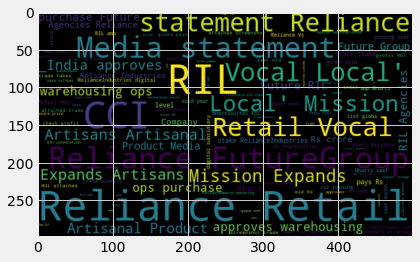

In [ ]:
# Plot the Word Cloud

allWords  = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis = 'Off'
plt.show()

In [ ]:
# Create a function to compute negative, neutral and positive analysis

def getAnalysis(score):

  if score < 0:
    return 'Negative'

  elif score == 0:
    return 'Neutral'

  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe

df



,Tweets,Subjectivity,Polarity,Analysis
0,": . pays Rs 33,737 crore for a 7.73% stake in ...",0.000,0.0,Neutral
1,": Reliance apna Bhagwan hai, 9/10 times SKARS...",0.000,0.0,Neutral
2,"Reliance apna Bhagwan hai, 9/10 times SKARSH ...",0.000,0.0,Neutral
3,": . pays Rs 33,737 crore for a 7.73% stake in ...",0.000,0.0,Neutral
4,RIL may take retail segment of ITC\n\nRoumers\...,0.000,0.0,Neutral
...,...,...,...,...
95,: ._India approves warehousing ops purchase of...,0.125,0.0,Neutral
96,: ._India approves warehousing ops purchase of...,0.125,0.0,Neutral
97,: ._India approves warehousing ops purchase of...,0.125,0.0,Neutral
98,._India approves warehousing ops purchase of F...,0.125,0.0,Neutral


In [ ]:
# Print all of the positive tweets

j = 1
sortedDf = df.sort_values(by=['Polarity'])
for i in range (0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDf['Tweets'][i])
    print()
    j = j+1

1) Shares go up more than 2 per cent after CCI approves Future Group-Reliance retail deal. Reliance CMP 1,955.20 INR +55.70 (2.93%) RIL

2) Reliance Industries shares rose after the Competition Commission cleared the proposed acquisition of Future Group.… 

3) Wants to be Debt Free ? 
Like Mukush Ambani JI.
Financial Freedom.
Covid 19 Impacts.
OTS - one time settlements.
Le… 

4) Reliance Industries Limited: RELIANCE is trading at 1,959.70 INR +60.20 or 3.17% higher. NiftyEnergy is up 2.84%… 

5) Reliance RIL Live Stock Futures Trade WITH JUST 15K CAPITAL explanation in HINDI:
 

6) Reliance Industries Limited| Reliance Industries Ltd traded up more than 2% in the morning session. 

RIL high is… 

7) RELIANCE RIL CMP 1899 should it correct more or one small bounce check below video I discuss Reliance in Detail 

8) : I predicted last year RIL price double in 8 months time &amp; Ambani ji climb world top 5 billionaires fortune list , my predicti…

9) Reliance is trading very close to it

In [ ]:
# Print all of the negative tweets

j = 1
sortedDf = df.sort_values(by=['Polarity'], ascending= 'False')
for i in range (0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDf['Tweets'][i])
    print()
    j = j+1

1) _daswani: Reliance 

Stock struggled to remain above the demand zone

But 2 black cobra candles changed the fate😤

Chart looks brok…

2) Reliance looks weak cmp 1900 Position View

BSE StockMarket Stock StockTrading Twitter India jamnagar… 

3) Team Prashant Jain at HDFC AMC cut stakes in RIL, TaMo and 24 other Nifty stocks in October

See the obvious “Yes v… 

4) Reliance on Friday broke a key support level and closed at day low. 1945(Futures) is one level to watch. Except a b… 

5) : stock Alert :  Reliance Vs bhartiairtel

~ RIL down 10% &amp; Bharti up 20% in last 1 month.

~ we sold our 3 year old ho…

6) RELIANCE CHARTS WERE WEAK FROM 2000 LEVEL.
LETS SEE WHETHER IT MANAGES TO HOLD 1850.

OTHERWISE NEXT LEVEL MAYBE 16… 

7) RELIANCE CHARTS WERE WEAK FROM 2000 LEVEL.
LETS SEE WHETHER IT MANAGES TO HOLD 1850.

OTHERWISE NEXT LEVEL MAYBE 16… 

8) CCI (Competition Commission of India) approved Future Group-Reliance Retail deal: Reliance Industries Limited annou… 

9) _finance: But

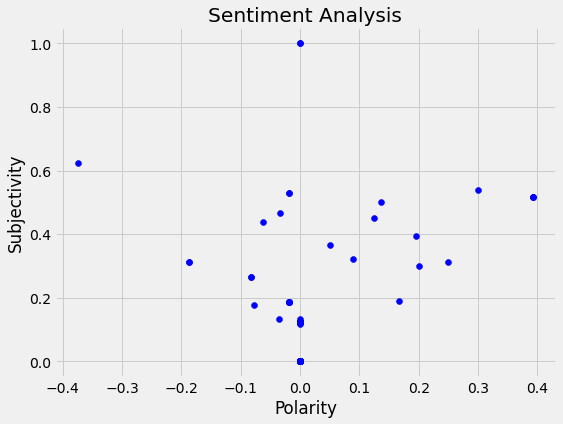

In [ ]:
# Plot the Subjectivity and Polarity

plt.figure(figsize = (8,6))

plt.scatter(df['Polarity'], df['Subjectivity'], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets

ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['Tweets']

round (ptweets.shape[0] / df.shape[0],1) * 100

10.0

In [ ]:
# Get the percentage of negative tweets

ntweets = df[df.Analysis=='Negative']

ntweets = ntweets['Tweets']

round (ntweets.shape[0] / df.shape[0],1) * 100

20.0

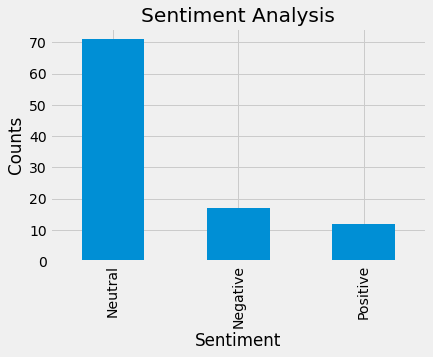

In [ ]:
# Show the value counts

df['Analysis'].value_counts()

# Plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()
